<img src="https://media.giphy.com/media/wG4p10gt7UqmOzGkMe/giphy.gif">

Netflix is one of the fastest growing OTT platforms in the world today. It has acquired a big viewer base of movie and TV show lovers across the globe especially in the last decade. It is rather exciting to make use of data science techniques to gather insights about this entertainment giant.

The netflix dataset consists of TV shows and Movies available on Netflix as of 2019. There are 6234 rows, one row for each show and 12 columns listing the attributes as mentioned below. The data fields are as follows:
* show_id: a unique id for each  show
* type: Type of content - either movie or tv show
* title: Title of the movie/tv show
* director: Director of the movie/tv show
* cast: Actors in the movie/tv show
* country: Country where the show is available
* date_added: Date when the show was added on Netflix
* release_year: Year of release of the movie/tv show
* rating: TV/Movie rating for the show
* duration: Duration of movie (in minutes)/tv show (in seasons)
* listed_in: Category in which the show is listed
* description: A brief description of the plot

As already mentioned, this data offers scope for doing some interesting analysis on movies and tv shows on Netflix and this would be my major focus in this notebook. To make this more interesting, I would integrate this dataset with IMDB ratings to carry out rating related analysis. I will also build a simple movie recommender system using NLP to get 10 movie recommendations based on a selected movie. This notebook contains
1. Loading the necessary packages and dataset
2. Exploratory Data Analysis
3. Data Cleaning & Preparation
4. Building a Basic Recommender system
5. Testing the system
6. Conclusion


# Import necessary packages

In [1]:
#basic packages 
import numpy as np
import pandas as pd

#for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
import plotly.express as px
from plotly import graph_objects as go

#plot wordcloud
from collections import Counter
from wordcloud import WordCloud

#sklearn NLP tools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import  cosine_similarity

#silence warnings
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
all_data = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [3]:
#display top few rows
all_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# Exploratory Data Analysis

# 1. Netflix content type

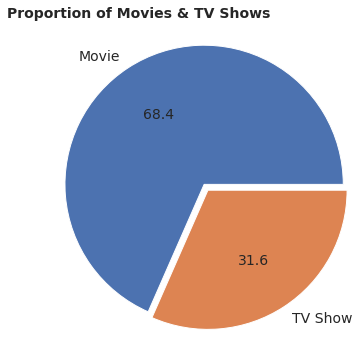

In [5]:
labels = all_data.type.value_counts().index
vals = all_data.type.value_counts().values
plt.pie(vals, explode=[0, 0.08], radius=1.6, labels=labels, autopct='%.1f', textprops={'fontsize': 14})
plt.title('Proportion of Movies & TV Shows', fontsize=14, fontfamily='calibri', fontweight='bold', position=(0.20, 1.22+0.02))
plt.show()

More than two-thirds of the content on Netflix consists of Movies

# 2. When was the content added during the observation period: 2008 - 2020?

In [6]:
#create year column and parse year from date_added column
all_data['year'] = all_data['date_added'].dropna().apply(lambda x: x.split(',')[-1])

#parse month from date_added column
all_data['month'] = all_data['date_added'].dropna().apply(lambda x: x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', \
               'September', 'October', 'November', 'December'][::-1]

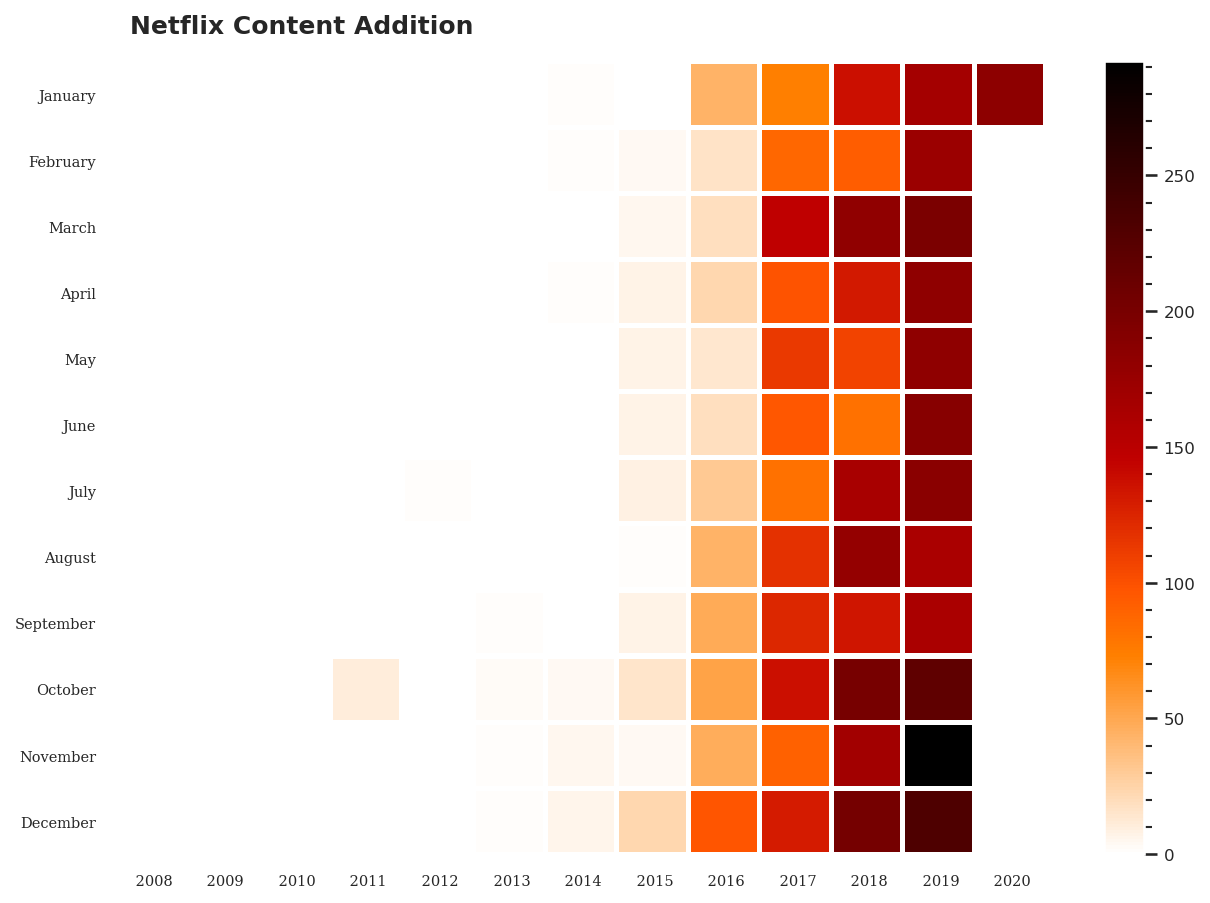

In [7]:
month_count = all_data.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 7), dpi=150)

# plot heatmap of content addition
plt.pcolormesh(month_count, cmap='gist_heat_r', edgecolors='white', linewidths=2) 
plt.xticks(np.arange(0.5, len(month_count.columns), 1), month_count.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(month_count.index), 1), month_count.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Content Addition', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

Most of the content is added in the year 2019. Also in terms of months, it appears that maximum content is added towards the year end. 

# 3. Growth trend

In [8]:
all_data['date_added'] = pd.to_datetime(all_data['date_added'])

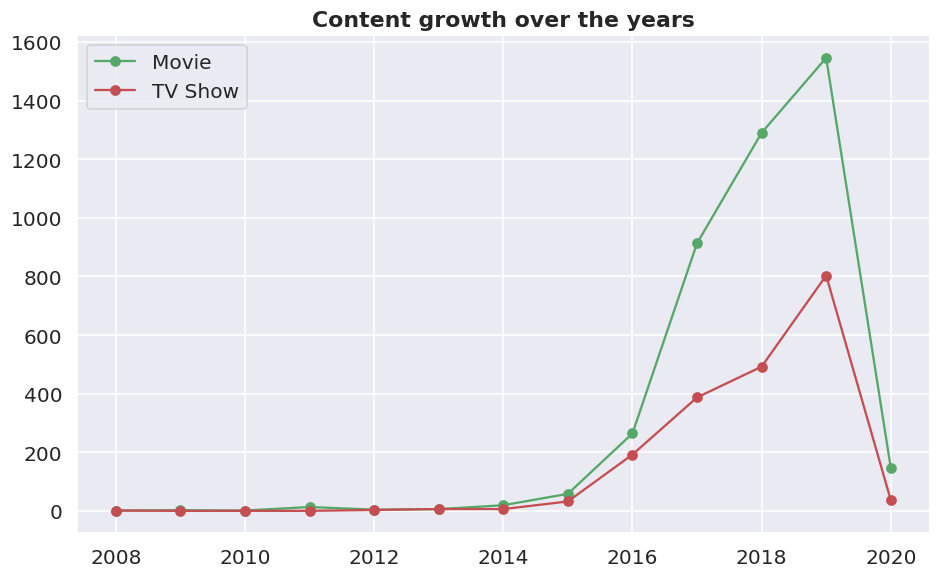

In [9]:
movies = all_data[all_data['type']=='Movie']
tv_shows = all_data[all_data['type']=='TV Show']
year_added = pd.DataFrame(index=np.unique(all_data.date_added.dt.year))
mov = movies['date_added'].dt.year.value_counts()
tv = tv_shows['date_added'].dt.year.value_counts()
year_added['Movie'] = mov
year_added['TV_show'] = tv 
year_added = year_added.fillna(0).astype(int)

plt.figure(figsize=(10,6), dpi=110)
plt.plot(year_added.index, year_added.Movie, 'go-', label='Movie')
plt.plot(year_added.index, year_added.TV_show, 'ro-', label='TV Show')
plt.title('Content growth over the years', fontweight='bold')
plt.legend()
plt.show()

Over the years, more Movies have been added in Netflix than TV shows. The peak for both these types of content was in 2019 - about 1550 for Movies and 800 for TV Shows. Growth of content on the platform started picking up rapidly from 2015. 

# 4. Movie & TV Show rating analysis

**Movies with highest & lowest IMDB ratings**

As IMDB ratings are not readily available in netflix dataset, I'll be merging two separate IMDB datasets in order to get the ratings for the movies listed in netflix. 

In [10]:
imdb_movies = pd.read_csv('../input/imdb-movie-ratings/IMDb movies.csv', usecols=['title','genre'])
imdb_ratings = pd.read_csv('../input/imdb-movie-ratings/IMDb ratings.csv', usecols=['weighted_average_vote'])

In [11]:
ratings = pd.DataFrame({'title':imdb_movies.title, 'genre':imdb_movies.genre, \
                       'imdb_rating':imdb_ratings.weighted_average_vote})
ratings.drop_duplicates(subset=['title', 'imdb_rating'], inplace=True)
ratings.dropna()

# merging the ratings table with all_data table using inner join to drop any movies present in netflix table 
# but not in imdb ratings table
netflix_ratings = ratings.merge(all_data, left_on='title', right_on='title', how='inner')
netflix_ratings = netflix_ratings.sort_values(by='imdb_rating', ascending=False).dropna()

In [12]:
top_rated=netflix_ratings[0:10]

# Plotly suburst plot showing release_year, released countries & title
fig =px.sunburst(
    top_rated,
    path=['release_year', 'country', 'title'],
    values='imdb_rating',
    color='imdb_rating', title='Movies with high ratings')
fig.show()

**Which are the low rated movies?**

In [13]:
lowest_rated=netflix_ratings[-10:]
fig =px.sunburst(
    lowest_rated,
    path=['release_year', 'country', 'title'],
    values='imdb_rating',
    color='imdb_rating', title='Movies with low ratings')
fig.show()

Among the movies with high ratings, there are a couple of movies which released in 1970's. Let's see which are the oldest movies & TV shows available on Netflix

**Some oldest movies**

In [14]:
movies[['title', 'release_year']].sort_values(by='release_year').head(15)

,title,release_year
2013,The Battle of Midway,1942
2011,Prelude to War,1942
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2022,Undercover: How to Operate Behind Enemy Lines,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2009,Nazi Concentration Camps,1945
2005,Know Your Enemy - Japan,1945


**Some oldest TV Shows**

In [15]:
tv_shows[['title', 'release_year']].sort_values(by='release_year').head(15)

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
4079,Pioneers of African-American Cinema,1946
5981,The Twilight Zone (Original Series),1963
5980,The Andy Griffith Show,1967
5704,Star Trek,1968
614,Monty Python's Fliegender Zirkus,1972
5669,Monty Python's Flying Circus,1974
5830,Dad's Army,1977
4273,El Chavo,1979
4369,Ninja Hattori,1981


Besides the IMDB ratings, there are general TV show and film rating systems.

Television rating systems are meant to evaluate the content and report the suitability of television programs for children, teenagers, or adults. Many countries have their own television rating system and countries' rating processes vary by local priorities. Some of the ratings are: 
* TV-MA: These programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17
* TV-14; This program may be unsuitable for children under 14 years of age
* TV-G: This program is suitable for all ages
and so on.

Similarly for movies:

* PG-13: Some material may be inappropriate for children under 13
* NC-17: Adults only etc

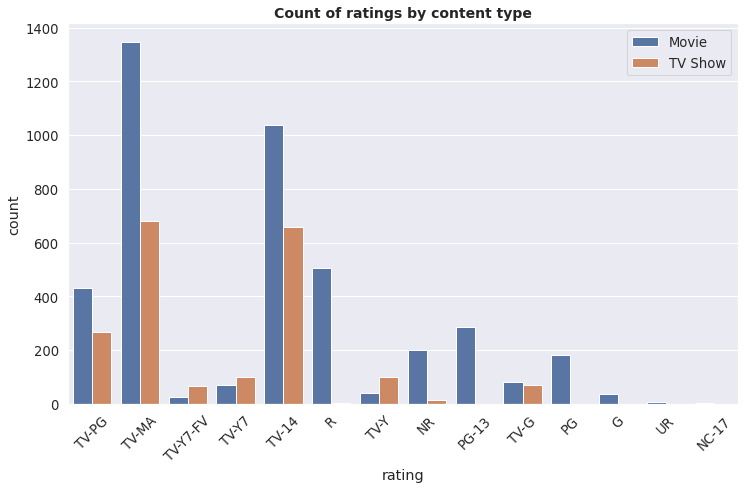

In [16]:
rating_content_type = all_data[['type', 'rating']]
plt.figure(figsize=(12,7))
sns.countplot(rating_content_type['rating'], hue=rating_content_type['type'])
plt.xticks(rotation=45)
plt.title('Count of ratings by content type', fontsize=14, fontweight='bold', fontfamily='calibri')
plt.legend(loc='upper right')
plt.show()

# 5. Duration of movies and TV Shows

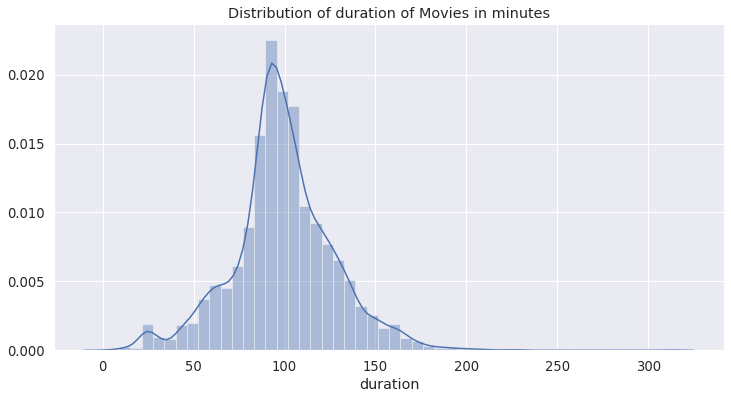

In [17]:
movies_duration = movies.duration.apply(lambda x: x.split()[0])
plt.figure(figsize=(12,6))
sns.distplot(movies_duration)
plt.title('Distribution of duration of Movies in minutes')
plt.show()

**Count of TV Shows by number of seasons**

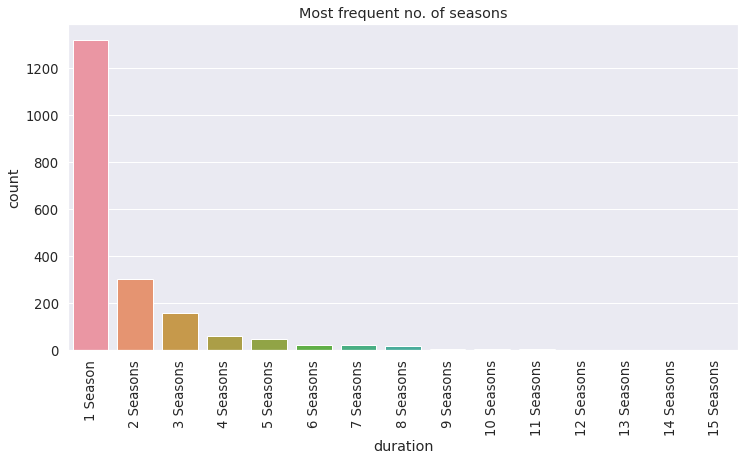

In [18]:
season_order = ['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons', \
                                         '6 Seasons', '7 Seasons', '8 Seasons', '9 Seasons', '10 Seasons', \
                                         '11 Seasons', '12 Seasons', '13 Seasons', '14 Seasons', '15 Seasons']
plt.figure(figsize=(12,6))
sns.countplot(tv_shows.duration, order = season_order).set_title('Most frequent no. of seasons')
plt.xticks(rotation=90)
plt.show()

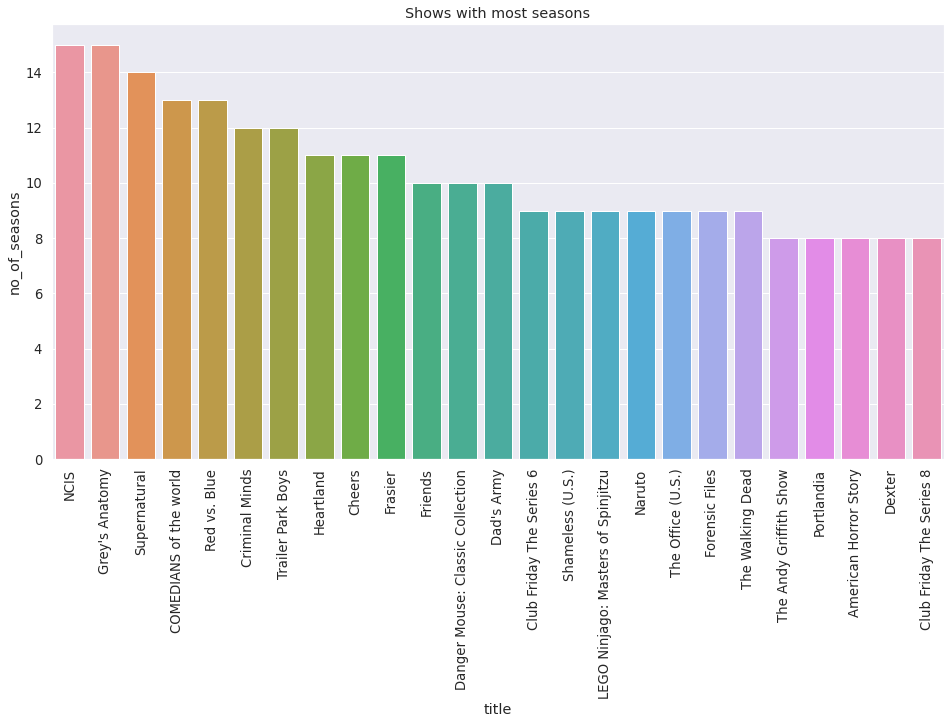

In [19]:
duration = tv_shows['duration'].apply(lambda x: x.split()[0]).astype(int)
tv_shows['no_of_seasons'] = duration
most_seasons = tv_shows[['title', 'no_of_seasons']].sort_values(by='no_of_seasons', ascending=False)[:25]
plt.figure(figsize=(16,8))
sns.barplot(x = 'title', y='no_of_seasons', data=most_seasons).set_title('Shows with most seasons')
plt.xticks(rotation=90)
plt.show()

# 6. Which countries have a high share of contribution in terms of Content?

In [20]:
# get the top 10 countries by overall content
top_countries = all_data['country'].value_counts() 
top_countries = pd.DataFrame(top_countries)
top10_countries = top_countries[:10].reset_index()

# creating a new dataframe which has country names in descending order of movies 
mov_vals = pd.DataFrame(movies['country'].value_counts()).reset_index()

# merging the mov_vals dataframe with top10_countries dataframe on country names and renaming columns
top10_countries=top10_countries.merge(mov_vals, left_on='index', right_on='index', \
                                      how='inner').rename(columns={"country_x":"Overall", "country_y":"Movies"})

# creating a new dataframe which has country names in descending order of TV shows 
tv_vals = pd.DataFrame(tv_shows['country'].value_counts()).reset_index()

# merging the tv_vals dataframe with top10_countries dataframe on country names and renaming columns 
top10_countries=top10_countries.merge(tv_vals, left_on='index', right_on='index', \
                                      how='inner').rename(columns={"country":"TV_Shows", "index":"Country"})

# preparing the top10_countries dataframe for plotly funnel plot
countries = list(top10_countries['Country'])

df1 = pd.DataFrame(dict(count=top10_countries.Movies, Country=countries))
df1['Content type'] = 'Movies'

df2 = pd.DataFrame(dict(count=top10_countries.TV_Shows, Country=countries))
df2['Content type'] = 'TV Shows'

df = pd.concat([df1, df2], axis=0)

# plotting the graph
fig = px.funnel(df, x='count', y='Country', color='Content type', title="Countries with most content")
fig.show()

# 7. Genre Analysis

**Which are the top genres by count of shows?**

In [21]:
genre = list(all_data['listed_in'])
genres = []

for i in genre:
    j = list(i.split(','))
    for k in j:
        genres.append(k.strip())
genre_count = dict(Counter(genres).most_common(15)) #get the top 15 genres 
genre_count

{'International Movies': 1927,
 'Dramas': 1623,
 'Comedies': 1113,
 'International TV Shows': 1001,
 'Documentaries': 668,
 'TV Dramas': 599,
 'Action & Adventure': 597,
 'Independent Movies': 552,
 'TV Comedies': 436,
 'Thrillers': 392,
 'Children & Family Movies': 378,
 'Romantic Movies': 376,
 'Crime TV Shows': 363,
 "Kids' TV": 328,
 'Stand-Up Comedy': 281}

**Plotting count of shows by genre**

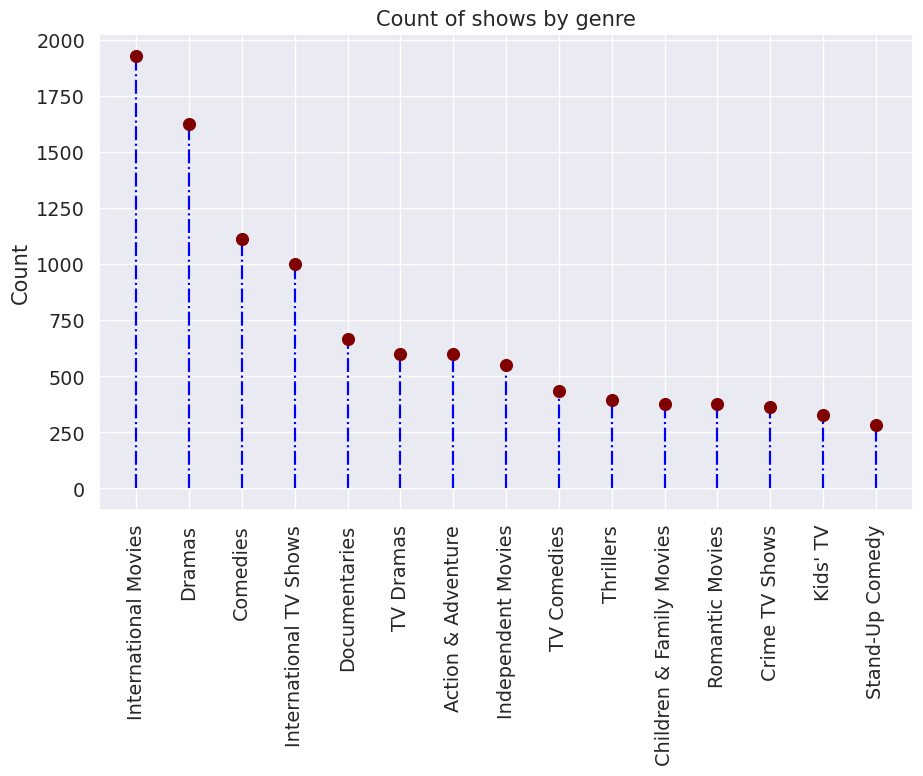

In [22]:
fig, ax = plt.subplots(figsize=(10,6), dpi=105)
x=list(genre_count.keys())
y=list(genre_count.values())
ax.vlines(x, ymin=0, ymax=y, color='blue', linestyle='dashdot')
ax.plot(x,y, "o", color='maroon', markersize=8)
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count")
ax.set_title("Count of shows by genre")
plt.show()

**Word Cloud for genres**

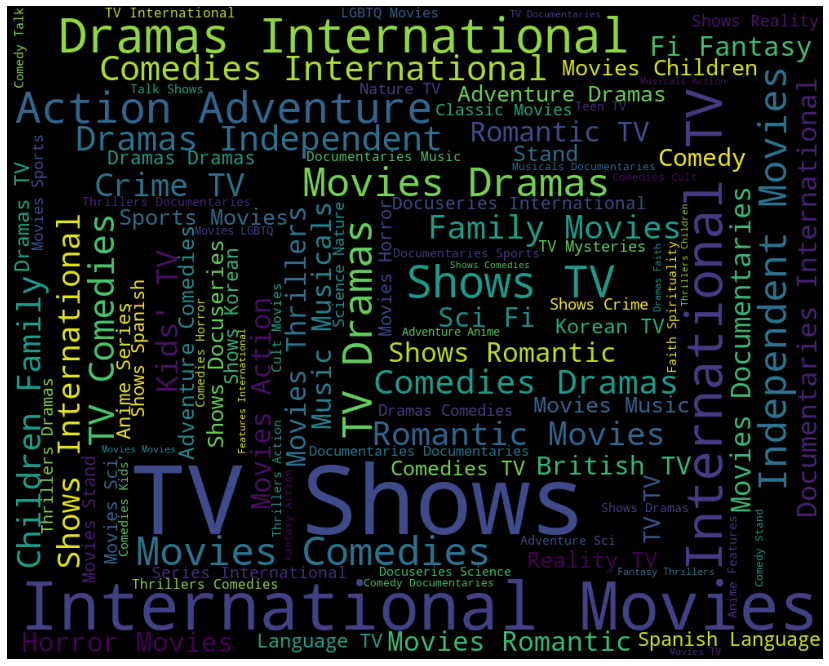

In [23]:
plt.figure(figsize=(15,12))
wc = WordCloud(width=1000, height=800, max_words=100, prefer_horizontal=0.7, min_font_size=8).generate(' '.join(genres))
plt.imshow(wc)
plt.axis('off')
plt.show()

**What if we want to see the top genres in a particular country?**

In [24]:
def genre_tree_map(country):
    """
    This function plots tree map depicting the count of titles by  genre for a chosen country
    """
    tree=all_data[all_data['country']==country]
    tree=tree.dropna()
    import plotly.express as px
    fig = px.treemap(tree, path=['country','type','listed_in'],
                      color='listed_in', hover_data=['country','type','listed_in'])
    return fig.show()

**Top genres in The United States**

In [25]:
genre_tree_map('United States')

Click on the right vertical bar to view tree map for TV Shows category

**Which are the top genres in India?**

In [26]:
genre_tree_map('India')

# 8. Analysis of Cast & Crew

**Actors with most shows on Netflix from India, US & UK**

In [27]:
def list_top_actors(country, num_actors):
    
    """
    This function returns a table with top num_actors of actors from a chosen country
    """
    df = pd.DataFrame(all_data['cast'][all_data.country==country]).dropna()
    top_actors = []
    cast = list(df.cast)
    for i in cast:
        j = i.split(',')
        for k in j:
            top_actors.append(k.strip()) 
    top_actors = pd.DataFrame(Counter(top_actors).most_common(num_actors)).rename(columns={0:'Cast', 1:'Count'})
    return top_actors

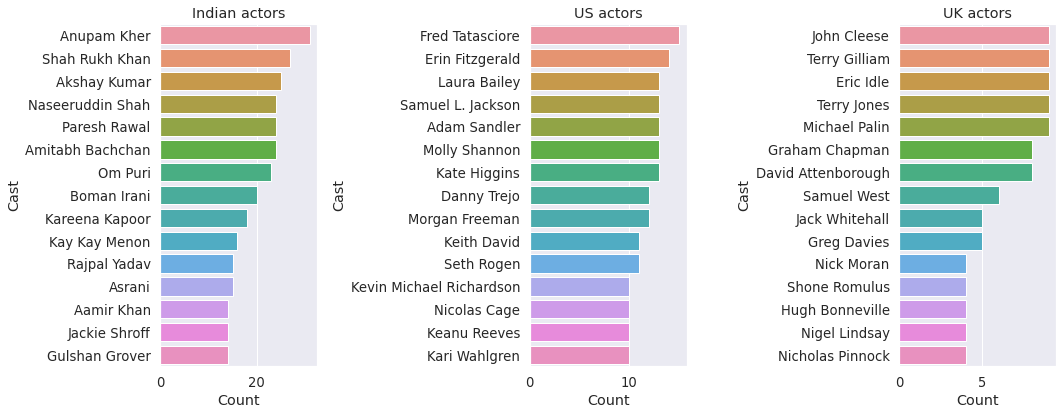

In [28]:
indian_actors = list_top_actors('India', 15)
us_actors = list_top_actors('United States',15)
uk_actors = list_top_actors('United Kingdom',15)

# plotting three bar graphs in one row 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
sns.barplot(x='Count', y='Cast', data=indian_actors, ax=ax1)
ax1.set_title('Indian actors')
sns.barplot(x='Count', y='Cast', data=us_actors, ax=ax2)
ax2.set_title('US actors')
sns.barplot(x='Count', y='Cast', data=uk_actors, ax=ax3)
ax3.set_title('UK actors')
plt.tight_layout()
plt.show()

**Directors with most shows on Netflix from India, US & UK**

In [29]:
def list_top_directors(country, num_directors):
    """
    This function returns a table with top num_directors of directors from chosen country
    """
    df = pd.DataFrame(all_data['director'][all_data.country==country]).dropna()
    top_directors = []
    crew = list(df.director)
    for i in crew:
        j = i.split(',')
        for k in j:
            top_directors.append(k.strip()) 
    top_actors = pd.DataFrame(Counter(top_directors).most_common(num_directors)).rename(columns={0:'Crew', 1:'Count'})
    return top_actors

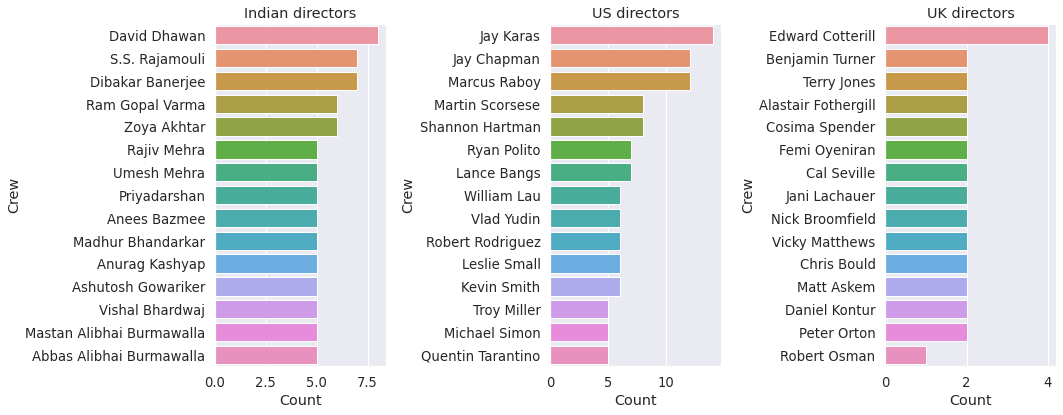

In [30]:
indian_directors = list_top_directors('India', 15)
us_directors = list_top_directors('United States',15)
uk_directors = list_top_directors('United Kingdom',15)

# plotting three bar graphs in one row 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
sns.barplot(x='Count', y='Crew', data=indian_directors, ax=ax1)
ax1.set_title('Indian directors')
sns.barplot(x='Count', y='Crew', data=us_directors, ax=ax2)
ax2.set_title('US directors')
sns.barplot(x='Count', y='Crew', data=uk_directors, ax=ax3)
ax3.set_title('UK directors')
plt.tight_layout()
plt.show()

# 9. Which are the latest movies in the database?

In [31]:
new_movies = movies[['title', 'release_year', 'country']].sort_values(by='release_year', ascending=False).dropna().head(10)
new_movies

,title,release_year,country
3518,Ghost Stories,2020,India
3180,Bulletproof 2,2020,United States
3427,Leslie Jones: Time Machine,2020,United States
3195,"Live Twice, Love Once",2020,Spain
3249,All the Freckles in the World,2020,Mexico
1077,Atlantics,2019,"France, Senegal, Belgium"
1079,I Lost My Body,2019,France
4457,Ronny Chieng: Asian Comedian Destroys America!,2019,United States
1088,Holiday Rush,2019,United States
1097,Evvarikee Cheppoddu,2019,India


# 10. Which are the latest TV Shows?

In [32]:
new_shows = tv_shows[['title', 'release_year', 'country']].sort_values(by='release_year', ascending=False).dropna().head(10)
new_shows

,title,release_year,country
3541,Messiah,2020,United States
3426,Kipo and the Age of Wonderbeasts,2020,United States
1315,Maradona in Mexico,2020,"Argentina, United States, Mexico"
3325,"Sex, Explained",2020,United States
3363,Handsome Siblings,2020,China
3379,Killer Inside: The Mind of Aaron Hernandez,2020,United States
3220,Dracula,2020,United Kingdom
3464,AJ and the Queen,2020,United States
3466,Jamtara - Sabka Number Ayega,2020,India
3467,Medical Police,2020,United States


# Basic Recommender System

There are broadly two types of recommender systems - collaborative filtering and content based recommender systems. 
* With collaborative filtering, unseen movies are recommended to users based on ratings provided by similar users who already watched those movies. With content based filtering, unseen movies are recommended to users based on the movies they watched before. 
* With collaborative filtering, a user may get recommendations in new genres based on content liked by similar users, whereas with content based filtering, a user gets recommendations mostly from genres in which he already liked movies. I will be developing a basic content based recommender system using the netflix dataset.

<a href='https://www.linkpicture.com/view.php?img=LPic5fb8c85a7af2a955064582'><img src='https://www.linkpicture.com/q/data-science-movie-recommendation-project.jpg' type='image'></a>

# Data Cleaning & Preparation

The key idea behind the recommender system is to find the similarity between two movies (or any entites in general) with the help of a similarity score. Therefore the text data first needs to be converted to numbers with the help of NLP tools. But before that the data needs to be cleaned.

In [33]:
df=all_data.fillna('') #fill all null values with empty string

#selecting columns which will be used for computing similarity scores between movies
features=['title','director','cast','listed_in','description']
df=df[features]

df.head(2)

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [34]:
#convert all text into lowercase
def clean_data(x):
        return str.lower(x)
    
for feature in features:
    df[feature] = df[feature].apply(clean_data)

In the next step, I will concatenate text in all the selected columns to get a single group of words. This group will be used to convert text to tokens and to compute a cosine similarity matrix later.

In [35]:
def bag_of_words(r):
    return r['title']+ ' ' + r['director'] + ' ' + r['cast'] + ' ' +r['listed_in']+' '+ r['description']

df['bag_of_words'] = df.apply(bag_of_words, axis=1)

In [36]:
df.head(2)

,title,director,cast,listed_in,description,bag_of_words
0,norm of the north: king sized adventure,"richard finn, tim maltby","alan marriott, andrew toth, brian dobson, cole...","children & family movies, comedies",before planning an awesome wedding for his gra...,norm of the north: king sized adventure richar...
1,jandino: whatever it takes,,jandino asporaat,stand-up comedy,jandino asporaat riffs on the challenges of ra...,jandino: whatever it takes jandino asporaat s...


# Modeling

Now the data is ready for modeling. The next step is to convert the text to numbers using CountVectorizer which returns a sparse matrix in which each row represents one table record and the columns denote tokenized words comprising the complete vocabulary.

In [37]:
count = CountVectorizer(stop_words='english')

count_matrix = count.fit_transform(df['bag_of_words'])

count_matrix

<6234x42956 sparse matrix of type '<class 'numpy.int64'>'
	with 215337 stored elements in Compressed Sparse Row format>

There are 6234 records in our data and the vocabulary size is 42956. The matrix has 215337 non-zero values.

**Cosine Similarity**

Cosine similarity is the dot product of two vectors divided by the product of the magnitude of each vector. Here we are only interested in the angle between the vectors, so we normalize the data by dividing with magnitude.
The cosine of a 0 degree angle is 1, therefore the closer to 1 the cosine similarity is, the more similar the items are. 

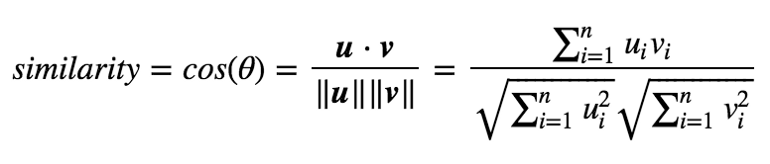

In [38]:
# compute cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [39]:
df=df.reset_index() 

#create a reference table to extract movies based on index value 
indices = pd.Series(df.index, index=df['title'])

In [40]:
def get_movie_recommendations(title, cosine_sim=cosine_sim):
    
    """
    This function accepts a movie title, cosine_similarity matrix and returns 10 similar movies as recommendation
    """
    
    title=title.lower()
    
    if title not in all_data['title'].str.lower().to_list():
        print (f'Sorry! {title.upper()} is not present in Netflix movie database')
        
    else:
        idx = indices[title]

        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[1:11]

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        recommended_movies = all_data['title'].iloc[movie_indices]

        return print(f'Recommended movies based on your selection - {title.upper()}:\n', recommended_movies)

# Test the Model

Let's test the model with some movie names

In [41]:
get_movie_recommendations('Die Another Day')

Recommended movies based on your selection - DIE ANOTHER DAY:
 4197                  GoldenEye
4234    The World Is Not Enough
4235        Tomorrow Never Dies
3407         Operation Chromite
3639    XXX: State of the Union
5847    Hyori's Bed & Breakfast
390         She's Gotta Have It
1977           A Korean Odyssey
1363           Enter the Dragon
4371             Watership Down
Name: title, dtype: object


In [42]:
get_movie_recommendations('The Conjuring')

Recommended movies based on your selection - THE CONJURING:
 1547                Insidious
3742     To and From New York
2990                    Creep
204                 The Witch
4172                 Adrishya
456         In the Tall Grass
1663           The Perfection
3571    The Amityville Horror
1636              Lifechanger
642                   93 Days
Name: title, dtype: object


In [43]:
get_movie_recommendations('Lagaan')

Recommended movies based on your selection - LAGAAN:
 4489                         Dil Chahta Hai
2379                                 Swades
1732    Once Upon a Time in Mumbai Dobaara!
41                                       PK
1306                        Mumbai Cha Raja
870                            Jodhaa Akbar
5401                  Ek Khiladi Ek Haseena
5054                               3 Idiots
4384                  Madness in the Desert
2742                           Maya Memsaab
Name: title, dtype: object


In [44]:
get_movie_recommendations('The Dark Knight')

Sorry! THE DARK KNIGHT is not present in Netflix movie database


# Conclusion

* This basic recommender system seems to be doing a decent job at recommending similar movies.
* There is a major drawback with this model which is it will not work with any movie title which is not present in the dataset or if the spelling does not match. 
* To overcome this issue, we can provide the users with a list of available titles to get the recommendations. 